Algorithmic Marketing based Project to do Customer Segmentation using **KMean Clustering Algorithm** and targeted Recommendations based on each segments.

Customer Segmentation is the process of **dividing customers into groups based on common characteristics** so companies can market to each group effectively and appropriately

One of the major application of K means clustering is segmentation of customers **to get a better understanding of them which in turn could be used to increase the revenue of the company.**



**Aim : To Better Understand the customers and apply different marketing approaches by building clustering models**

**Work Flow :** 
* Customer Dataset 
* Data Preprocessing
* Data Analysis 
* Finding Optimum no. of Clusters
* Fitting into K-Mean Clustering Algorithm 
* Visualising the Data 


**Importing the Dependencies**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Data Collection and Analysis**

In [4]:
# loading the data from csv file to pandas dataframe 
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [5]:
# 1st 5 rows in dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Finding the number of rows and Columns
customer_data.shape

(200, 5)

In [7]:
# Getting info about the dataset 
# can be used for checking if the null values 
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# About the missing values check
customer_data.isnull().sum()

# If Missing values are Present Follow the methods of Imputation i.e. 
# Replacing the suitable values 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Choosing the Annual Income Column and Spending Score Column**

In [9]:
# choosing the all the rows and 3rd and 4th column (Slicing)
# 3rd column : Annual income 
# 4th column : Spending Score

X = customer_data.iloc[:,[3,4]].values

In [10]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

**Choosing the Optimum number of clusters**

In [11]:
# WCSS (Within cluster sum of Squares)
# elbow method 
# finding wcss value for different clusters 
# random state -> data arranged in random way 
# inertia gives the wcss values 

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state = 42)
  kmeans.fit(X)
  
  wcss.append(kmeans.inertia_)

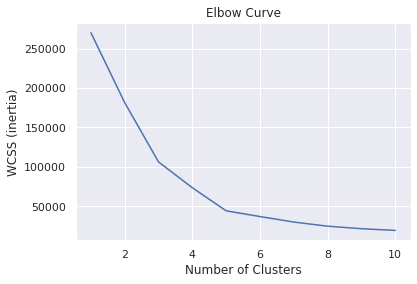

In [12]:
# plotting the elbow graph to find the optimum number of clusters
# sns ->seaborn 
# Seaborn is more comfortable in handling Pandas data frames
# seaborn utilises fascinating themes, while matplotlib used for making basic graphs. Seaborn contains a few plots and patterns for data visualisation,
# while in matplotlib, datasets are visualised with the assistance of lines, scatter plots, pie charts, histograms, bar-graphs, etc.
# Seaborn provides a high-level interface for drawing attractive and informative statistical graphics.

sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (inertia)')
plt.show()

**Optimum Number of Clusters (K) = 5 (From Elbow Curve)**

**Training the K-Means Clustering Model ,
K is the number of clusters taken**

In [13]:
kmeans = KMeans(n_clusters = 5,init ='k-means++', random_state = 0)

#return a label for each data point based on their cluster 
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


**Visualising the Clusters**

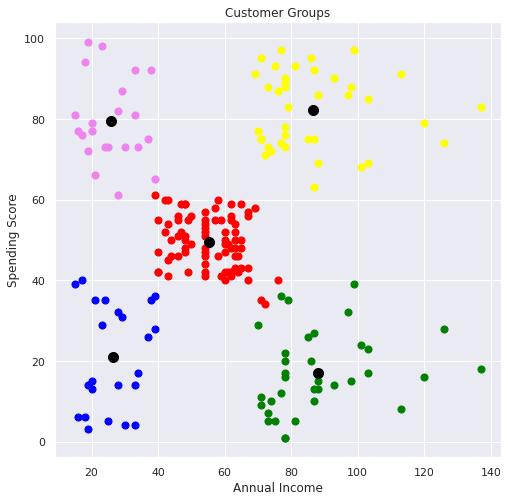

In [14]:
# 5 clusters : 0,1,2,3,4
#  plotting the clusters and their centroids 
# Y represents cluster identity or cluster values corresponding to x
# plotting the x coordinate and y coordinate
# y==0 means the cluster 1 and ,0 means the first column of X , 1 means the second columns of X
# s = size of dots   

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c= 'green', label ='Cluster1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c= 'red', label ='Cluster2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c= 'yellow', label ='Cluster3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c= 'violet', label ='Cluster4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c= 'blue', label ='Cluster5')

# Plotting the Centroids for each Clusters 
# centroid coordinates x ,y 

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

**Insights :**

**Blue:** People with less income tend to spend less in supermarkets

**Violet:** People with less income tend to spend More on Buying things

**Red:** People with Normal income tend to spend Normally in supermarkets

**Yellow:** People with More income tend to spend More on buying things from supermarket

**Green:** People with More income are Cautious of Buying things from supermarket

**Conclusion**
* Supermarkets can give offer to those who are not buying too much i.e We got to know who these customers are and we can give better discounts and offers using some membership cards.
* Also we can target those people having high income and not spending much on buying things from supermarket


**Benifits for customer Segmentation** 
* **To increase the revenue of the supermarket**
* **Improve the Market Value and Profits By making better recommendation for them**

More examples : GoogleAds,Youtube ads, Netflix, Amazon Prime
